In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

In [44]:
train_data_total = pd.read_csv("20 Percent Training Set.csv")
test_data_total = pd.read_csv("KDDTest+.csv")

In [45]:
train_data_total.head(10)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


### 1) Extract normal instances from the training dataset as normal profile

In [46]:
normal_profile = train_data_total.loc[train_data_total["normal"] == "normal"]  
test_data_total.head(10)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.2,1.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


In [47]:
normal_profile.head(10)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.0,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
11,0,tcp,http,SF,287,2251,0,0,0,0,...,1.0,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,21
15,0,tcp,http,SF,300,13788,0,0,0,0,...,1.0,0.00,0.01,0.02,0.00,0.00,0.00,0.00,normal,21
17,0,tcp,http,SF,233,616,0,0,0,0,...,1.0,0.00,0.02,0.03,0.00,0.00,0.02,0.00,normal,21
18,0,tcp,http,SF,343,1178,0,0,0,0,...,1.0,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal,21
21,0,tcp,http,SF,253,11905,0,0,0,0,...,1.0,0.00,0.01,0.02,0.00,0.00,0.00,0.00,normal,21
22,5607,udp,other,SF,147,105,0,0,0,0,...,0.0,0.85,1.00,0.00,0.00,0.00,0.00,0.00,normal,21
24,507,tcp,telnet,SF,437,14421,0,0,0,0,...,0.1,0.05,0.00,0.00,0.53,0.00,0.02,0.16,normal,20


In [48]:
# convert string type to int type
normal_profile = normal_profile.apply(LabelEncoder().fit_transform)

In [49]:
# extract features from traning data(normal_profile)
normal_training = normal_profile.drop(columns=['normal']) 
normal_training.head(10)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,20
0,0,2,12,8,122,0,0,0,0,0,...,1,0,60,88,0,0,0,0,0,13
2,0,1,10,8,208,2867,0,0,0,0,...,255,100,0,3,4,3,1,0,1,19
3,0,1,10,8,175,354,0,0,0,0,...,255,100,0,0,0,0,0,0,0,19
11,0,1,10,8,263,1599,0,0,0,0,...,219,100,0,12,3,0,0,0,0,19
15,0,1,10,8,276,3369,0,0,0,0,...,255,100,0,1,2,0,0,0,0,19
17,0,1,10,8,209,523,0,0,0,0,...,255,100,0,2,3,0,0,2,0,19
18,0,1,10,8,319,942,0,0,0,0,...,255,100,0,1,4,0,0,0,0,19
21,0,1,10,8,229,3245,0,0,0,0,...,255,100,0,1,2,0,0,0,0,19
22,349,2,12,8,123,72,0,0,0,0,...,1,0,85,100,0,0,0,0,0,19
24,133,1,18,8,391,3392,0,0,0,0,...,25,10,5,0,0,50,0,2,16,18


In [50]:
# extract target attribute from traning data(normal_profile)
normal_target = normal_profile['normal']
normal_target.head(10)

0     0
2     0
3     0
11    0
15    0
17    0
18    0
21    0
22    0
24    0
Name: normal, dtype: int64

### 2) For every instance in the testing dataset, find the nearest neighbor instance in the normal profile and calculate the corresponding distance to it

In [51]:
# set n_neighbors = 1 find the nearest neighbour
neigh = KNeighborsClassifier(n_neighbors=1)

In [52]:
neigh.fit(normal_training,normal_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [53]:
# extract features from testing data
x_test = test_data_total.drop(columns=['neptune'])
x_test = x_test.apply(LabelEncoder().fit_transform)
# extract target attribute from testing data
y_test = test_data_total['neptune']

In [54]:
# convert multiclass to 2 class
y_test = y_test.replace('normal',0)
y_test = y_test.replace('[a-z]',1, regex = True)

In [55]:
# calculate the distance and the indices
distances, indices = neigh.kneighbors(x_test)

In [56]:
distances

array([[194.82812939],
       [ 57.51521538],
       [104.63269088],
       ...,
       [416.24391887],
       [ 22.627417  ],
       [159.39259707]])

In [57]:
new_dis = []
for item in distances:
    new_dis.append(item[0])

In [58]:
indices

array([[ 7774],
       [ 4909],
       [ 1077],
       ...,
       [11806],
       [ 8366],
       [ 9416]])

### 3) Vary the control threshold value to appropriately cover the value range of this distance (using at least 10 different values), classify each new instance as normal or attack accordingly
### 4)  Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) pair for each control threshold value used 

In [59]:
result = []
result.append(new_dis)
result.append(y_test.tolist())
result

[[194.82812938587693,
  57.51521537819362,
  104.63269087622663,
  108.96788517723927,
  50.75431016179808,
  97.52948272189288,
  56.991227395100026,
  33.24154027718932,
  48.4458460551573,
  93.40770846134703,
  70.8590149522275,
  178.294699865139,
  181.41664752717708,
  158.99685531481433,
  30.199337741083,
  28.053520278211074,
  34.19064199455752,
  250.72295467308135,
  220.2612085683723,
  177.2766200038798,
  134.13053343664893,
  32.57299494980466,
  36.6333181680284,
  174.54225849346628,
  238.1680079271773,
  33.66006535941367,
  25.059928172283335,
  345.0304334402981,
  252.30338880007142,
  241.47670695120885,
  77.33045971672482,
  31.20897306865447,
  96.56603957913983,
  300.4063914100364,
  152.3975065412817,
  26.419689627245813,
  70.12132343303284,
  23.643180835073778,
  68.26419266350405,
  151.6673992656299,
  35.014282800023196,
  48.425200051213004,
  38.28837943815329,
  240.12080293052495,
  31.400636936215164,
  202.51666598085205,
  413.3194890154588,

In [60]:
# predict and evaluate 
def cal_rate(result, threshold):
    length = len(result[0])
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for item in range(length):
        distance = result[0][item]
        if distance >= threshold:
            distance = 1 #anomaly
        if distance == 1:
            if result[1][item] == 1:
                TP += 1
            else:
                FP += 1
        else:
            distance = 0 #normal
            if result[1][item] == 0:
                TN += 1
            else:
                FN += 1
                
    TPR = float(TP)/float(TP+FN)
    FPR = float(FP)/float(FP+TN)
    FNR = float(FN)/float(TP+FN)
    TNR = float(TN)/float(TN+FP)
    accuracy = float(TP+FP)/float(TP+FN+FP+TN)
    
    return TPR, FPR, FNR, TNR,accuracy

In [61]:
thre = 10
i = 0
tpr = []
fpr = []
while i < 10:
    TPR, FPR, FNR, TNR,accuracy = cal_rate(result,thre)
    tpr.append(TPR)
    fpr.append(FPR)
    i += 1
    thre += 10
    print('threshold:' + str(thre) +  ', the tpr is:' + str(TPR) + ', the fpr is:' + str(FPR))

threshold:20, the tpr is:1.0, the fpr is:1.0
threshold:30, the tpr is:1.0, the fpr is:0.9997940267765191
threshold:40, the tpr is:0.9847256857855362, the fpr is:0.729145211122554
threshold:50, the tpr is:0.9759195760598504, the fpr is:0.3889804325437693
threshold:60, the tpr is:0.9244077306733167, the fpr is:0.2572605561277034
threshold:70, the tpr is:0.8682200748129676, the fpr is:0.18537590113285274
threshold:80, the tpr is:0.8507637157107232, the fpr is:0.14871266735324407
threshold:90, the tpr is:0.8365804239401496, the fpr is:0.1203913491246138
threshold:100, the tpr is:0.812889650872818, the fpr is:0.10205973223480948
threshold:110, the tpr is:0.7852244389027432, the fpr is:0.08424304840370751


###  Calculate the Area Under the Curve (AUC) 

In [62]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8766066176281748


 ### Plot the Receiver Operating Characteristic (ROC) curve

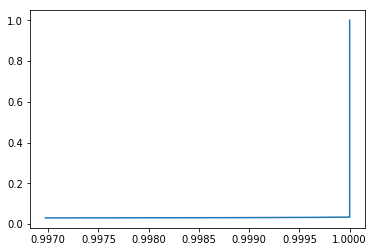

In [361]:
plt.plot(fpr, tpr, label = 'AUC = %0.2f' %roc_auc)